<a href="https://colab.research.google.com/github/ICBI/AIMAHEAD_GU/blob/main/Courses/ML_Concepts_in_R/Module_06_Natural_Language_Processing/R_version_of_Module_6_Natural_Language_Processing_02_text_representation_bow_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/AAlogo1.jpg" alt="Powered by" width="150"/>

#AI/ML for Healthcare Applications : Text Representation and Classification using Bag-of-words

Based on material from the Georgetown [Health Informatics and Data Science](https://healthinformatics.georgetown.edu) program and licensed under  [CC4.0](https://creativecommons.org/licenses/by/4.0/)



In this demo, we will explore how to represent textual data for Machine Learning. In this first part we will explore the **Bag of Words** representation of enconding text to vectors

In [ ]:
library(data.table)

### The Bag of Words representation

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

*    **tokenizing** strings and giving an integer id for each possible token, for instance by using whitespaces and punctuation as token separators.
*    **counting** the occurrences of tokens in each document.
*    **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.

In this scheme, features and samples are defined as follows:

*    each **individual token occurrence frequenc**y (normalized or not) is treated as a feature.
*    the vector of all the token frequencies for a given **document** is considered a multivariate sample.

A corpus of documents can thus be represented by a matrix with one row per document and one column per token (e.g. word) occurring in the corpus.

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific stragegy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

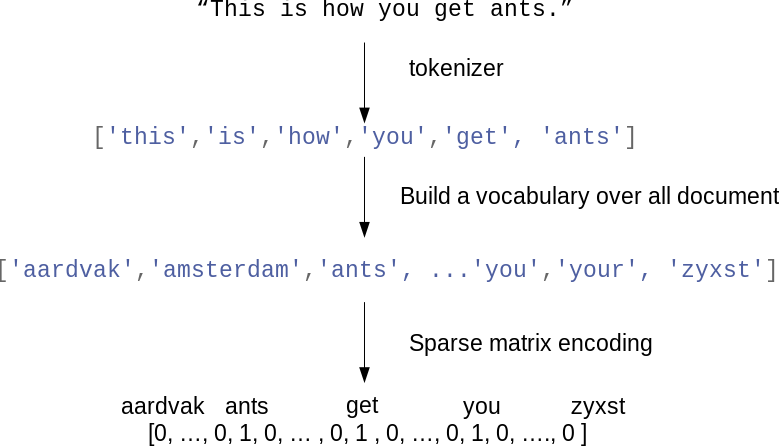

### Sparsity

As most documents will typically use a very subset of a the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In order to be able to store such a matrix in memory but also to speed up algebraic operations matrix / vector, implementations will typically use a sparse representation such as the implementations available in the `scipy.sparse `package.

### Count Vectorizer

The `CountVectorizer` function in R (https://search.r-project.org/CRAN/refmans/superml/html/CountVectorizer.html) implements both tokenization and occurrence counting in a single class:

**Bag-of-words on a toy dataset**

Some terms:

**document** - refers to a single piece of text information. This could be a text message, tweet, email, book, lyrics to a song. This is equivalent to one row or observation.

**corpus** - a collection of documents. This would be equivalent to a whole data set of rows/observations.

**token** - this is a word, phrase, or symbols derived from a document through the process of tokenization.



In [ ]:
messages <- c(
  "Patient A received an immunotherapy and got skin rash",
  "Patient B received chemotherapy instead of an immunotherapy"
)

We’ll use CountVectorizer() to create a matrix of numbers to represent our messages. CountVectorizer() takes what’s called the Bag of Words approach. Each message is seperated into tokens and the number of times each token occurs in a message is counted.

We’ll import CountVectorizer and instantiate it as an object, similar to how you would with a classifier from sklearn. In fact the usage is very similar. Instead of using fit() and then predict() we will use fit() then transform() or in one step fit_transform()

In [ ]:
if (!requireNamespace("superml", quietly = TRUE)) install.packages("superml")

library(superml)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘Metrics’, ‘BH’, ‘RcppArmadillo’


Loading required package: R6



In [ ]:
# Initialize a Count Vectorizer
vect <- CountVectorizer$new()

In [ ]:
vect

<CountVectorizer>
  Public:
    clone: function (deep = FALSE) 
    fit: function (sentences) 
    fit_transform: function (sentences) 
    initialize: function (min_df, max_df, max_features, ngram_range, regex, remove_stopwords, 
    lowercase: TRUE
    max_df: 1
    max_features: NULL
    min_df: 1
    model: NULL
    ngram_range: 1 1
    regex: [^a-zA-Z0-9 ]
    remove_stopwords: TRUE
    sentences: NA
    split:  
    transform: function (sentences) 
  Private:
    check_args: function (x, max_value, what) 
    get_bow_df: function (sentences, use_tokens = NULL) 
    get_tokens: function (sentences, min_df = 1, max_df = 1, ngram_range = NULL, 
    preprocess: function (sentences, regex = "[^0-9a-zA-Z ]", lowercase, remove_stopwords) 

This model has many parameters, however the default values are quite reasonable.
Full parameter details: https://search.r-project.org/CRAN/refmans/superml/html/CountVectorizer.html




In one step: **fit_transform()**

In [ ]:
vect <- CountVectorizer$new()

In [ ]:
messages

[1] "Patient A received an immunotherapy and got skin rash"      
[2] "Patient B received chemotherapy instead of an immunotherapy"

In [ ]:
X <- vect$fit_transform(messages)

In [ ]:
X

received,patient,immunotherapy,skin,rash,instead,got,chemotherapy,b
1,1,1,1,1,0,1,0,0
1,1,1,0,0,1,0,1,1


In [ ]:
dense_matrix <- as.matrix(X)
dim(dense_matrix)

[1] 2 9

In [ ]:
# Get the feature names
feature_names <- colnames(X)
print(feature_names)

[1] "received"      "patient"       "immunotherapy" "skin"         
[5] "rash"          "instead"       "got"           "chemotherapy" 
[9] "b"            


In [ ]:
# Convert to a data frame
df <- as.data.frame(dense_matrix)
#colnames(df) <- feature_names
print(df)

  received patient immunotherapy skin rash instead got chemotherapy b
1        1       1             1    1    1       0   1            0 0
2        1       1             1    0    0       1   0            1 1


#### Going beyond 1-grams

In [ ]:
messages

[1] "Patient A received an immunotherapy and got skin rash"      
[2] "Patient B received chemotherapy instead of an immunotherapy"

To preserve some of the local ordering information we can extract 2-grams of words in addition to the 1-grams (the word themselvs):

In [ ]:
# Initialize CountVectorizer with bigram settings
bigram_vectorizer <- CountVectorizer$new(ngram_range = c(1, 2))

# Fit and transform the messages
dtm_bigrams <- bigram_vectorizer$fit_transform(messages)

# Convert the sparse matrix to a dense matrix
dense_matrix_bigrams <- as.matrix(dtm_bigrams)

In [ ]:
bigram_vectorizer$fit_transform('Bi-grams are cool!')

grams cool,grams,cool,bi grams,bi
1,1,1,1,1


In [ ]:
dtm_bigrams

received,patient received,patient,immunotherapy,skin rash,skin,received immunotherapy,received chemotherapy,rash,instead immunotherapy,instead,immunotherapy got,got skin,got,chemotherapy instead,chemotherapy
1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0
1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1


In [ ]:
dim(dense_matrix_bigrams)

[1]  2 16

In [ ]:
colnames(dense_matrix_bigrams)

[1] "received"               "patient received"       "patient"               
 [4] "immunotherapy"          "skin rash"              "skin"                  
 [7] "received immunotherapy" "received chemotherapy"  "rash"                  
[10] "instead immunotherapy"  "instead"                "immunotherapy got"     
[13] "got skin"               "got"                    "chemotherapy instead"  
[16] "chemotherapy"

In [ ]:
# Convert the dense matrix to a data frame with proper column names
df_bigrams <- as.data.frame(dense_matrix_bigrams)
print("Document-Term Matrix with Bigrams:")
print(df_bigrams)

[1] "Document-Term Matrix with Bigrams:"
  received patient received patient immunotherapy skin rash skin
1        1                1       1             1         1    1
2        1                0       1             1         0    0
  received immunotherapy received chemotherapy rash instead immunotherapy
1                      1                     0    1                     0
2                      0                     1    0                     1
  instead immunotherapy got got skin got chemotherapy instead chemotherapy
1       0                 1        1   1                    0            0
2       1                 0        0   0                    1            1


### TF-IDF normalization

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningul information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

Tf means **term-frequency** while tf–idf means term-frequency times **inverse document-frequency**. This is a orginally a term weighting scheme developed for information retrieval (as a ranking function for search engines results), that has also found good use in document classification and clustering.

To generalize: `TF-IDF = term frequency * (1 / document frequency)`

Or: `TF-IDF = term frequency * inverse document frequency`


Term frequency is a weight representing how often a word occurs in a document. If we have several occurences of the same word in one document we can expect the TF-IDF to increase.

Inverse document frequency is another weight representing how common a word is across documents. If a word is used in many documents then the TF-IDF will decrease.


There are many ways to calculate the TF-IDF, but all essentially calculate the same concept.

tfidf(w,d) = tf * log((N+1)/(Nw +1 )) +1


In [ ]:
# Initialize TfidfVectorizer
tfidf_vectorizer <- TfIdfVectorizer$new()


In [ ]:
messages <- c(
  "Patient A received an immunotherapy and got skin rash",
  "Patient B received chemotherapy instead of an immunotherapy"
)

In [ ]:
# Fit and transform the messages
tfidf_matrix <- tfidf_vectorizer$fit_transform(messages)


In [ ]:
vocabulary_size <-length(colnames(tfidf_matrix))
cat("Vocabulary size:", vocabulary_size, "\n")

cat("Vocabulary content:", colnames(tfidf_matrix), "\n")

Vocabulary size: 9 
Vocabulary content: received patient immunotherapy skin rash instead got chemotherapy b 


In [ ]:
tfidf_vectorizer

<TfIdfVectorizer>
  Inherits from: <CountVectorizer>
  Public:
    clone: function (deep = FALSE) 
    fit: function (sentences) 
    fit_transform: function (sentences) 
    initialize: function (min_df, max_df, max_features, ngram_range, regex, remove_stopwords, 
    lowercase: TRUE
    max_df: 1
    max_features: NULL
    min_df: 1
    model: 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1
    ngram_range: 1 1
    norm: TRUE
    regex: [^a-zA-Z0-9 ]
    remove_stopwords: TRUE
    sentences: patient received immunotherapy got skin rash patient b r ...
    smooth_idf: TRUE
    split:  
    transform: function (sentences) 
  Private:
    check_args: function (x, max_value, what) 
    get_bow_df: function (sentences, use_tokens = NULL) 
    get_tokens: function (sentences, min_df = 1, max_df = 1, ngram_range = NULL, 
    gettfmatrix: function (countmatrix, sentences, norm, smooth_idf = TRUE) 
    preprocess: function (sentences, regex = "[^0-9a-zA-Z ]", lowercase, remove_stopwords) 

In [ ]:
# Convert the sparse matrix to a dense matrix
dense_matrix_tfidf <- as.matrix(tfidf_matrix)

# Convert to a data frame for better readability
df_tfidf <- as.data.frame(dense_matrix_tfidf)
cat("TF-IDF Matrix:\n")
print(df_tfidf)

TF-IDF Matrix:
   received   patient immunotherapy      skin      rash   instead       got
1 0.3347123 0.3347123     0.3347123 0.4704264 0.4704264 0.0000000 0.4704264
2 0.3347123 0.3347123     0.3347123 0.0000000 0.0000000 0.4704264 0.0000000
  chemotherapy         b
1    0.0000000 0.0000000
2    0.4704264 0.4704264


In [ ]:
tfidf_matrix

received,patient,immunotherapy,skin,rash,instead,got,chemotherapy,b
0.3347123,0.3347123,0.3347123,0.4704264,0.4704264,0.0000000,0.4704264,0.0000000,0.0000000
0.3347123,0.3347123,0.3347123,0.0000000,0.0000000,0.4704264,0.0000000,0.4704264,0.4704264


**Ending notes**

When instantiating your vectorizer there are a few arguments to tweak that can help downstream ML models

*    max_features = n : only considers the top n words orderd by term frequency
*    min_df = n : ignores words with a document frequency below n
*    max_df = n : ignores words with a document frequency above n
*    stop_words = [’ ‘] : ignores common words like 'the', 'that', 'which', etc. You’ll need to define in a list what words you want to include. There are lists of common stop words available online, the NLTK library also has a list of stop words built into it.


# Text Classification using Bag of Words

In this section, we will explore how to use the **Bag of Words** representation of enconding text to vectors and train shallow ML models (Logistic Regression, Naive Bayes, SVM etc.) for text classification

In [ ]:
# Load necessary libraries
library(data.table)  # For data manipulation
library(ggplot2)     # For plotting


### Dataset

For this workshop of text classification, we will using a corpus of adverse drug reaction sentences collected from PubMed articles.

Full details of the raw corpus can be found here:  https://pubmed.ncbi.nlm.nih.gov/22554702/

Raw corpus link: https://sites.google.com/site/adecorpus/

I have preprocessed the raw corpus and generated a csv file with


*   pubmed abstracts sentences with an adverse drug reaction: Posistive sentences
*  pubmed abstracts sentences with no adverse drug reaction: Negative sentences


In [ ]:
# Set the directory path
data_dir <- "https://raw.githubusercontent.com/ICBI/AIMAHEAD_GU_publicCourseData/main/ML_Concepts/ade_corpus_subset.csv"

# Read the CSV file
ade_df <- read.csv(file.path(data_dir))

In [ ]:
head(ade_df)

,pmid,sentence,label
,<int>,<chr>,<int>
1,11174414,"Severe rash, including the Stevens-Johnson syndrome (SJS), is the major toxicity of nevirapine and is described in the package labeling with a prominent, boxed warning.",1
2,12645965,Significant systemic manifestations are rare.,0
3,17172571,"Chronic paroxysmal hemicrania (CPH) is a rare primary headache syndrome, which is classified along with cluster headache and short-lasting unilateral neuralgiform headache attacks with conjunctival injection and tearing (SUNCT) as a trigeminal autonomic cephalalgia.",0
4,16109609,"Of twenty other patients in our practice who received gemcitabine for refractory lymphoma without developing pericardial effusion, none had received prior direct radiation to the heart.",0
5,15779196,A 74-year old white man was undergoing treatment with palliative chemotherapy for Stage IV Prostate Adenocarcinoma with multiple osteoblastic metastases.,0
6,15866658,"RESULTS: Of the 18 patients treated with MMF, there were 11 men (61.1%) and seven women (38.8%), with an overall mean age of 55.5 years.",0


In [ ]:
dim(ade_df)

[1] 11272     3

Positive instances

In [ ]:
ade_df[ade_df$label == 1, ]

,pmid,sentence,label
,<int>,<chr>,<int>
1,11174414,"Severe rash, including the Stevens-Johnson syndrome (SJS), is the major toxicity of nevirapine and is described in the package labeling with a prominent, boxed warning.",1
8,7696938,Arrhythmias and cardiac arrest have been reported during amphotericin B administration but no effective technique has been described to prevent them.,1
10,16298824,"Dyspnea, hypoxemia, and pleuritic chest pain occurred within 24 hours of rituximab administration, and there was no other apparent explanation.",1
13,8071504,Toxic optic neuropathy associated with ethambutol: implications for current therapy.,1
18,18037876,"Multiple syncopal episodes started to occur during thalidomide treatment, and a Holter electrocardiogram showed multiple abnormalities, with an episode of sustained ventricular tachycardia.",1
20,16092915,"OBJECTIVE: To our knowledge, this is the first published case report of an adolescent girl with a mitochondrial disorder and depression who displayed both new-onset psychotic and increased mood symptoms during treatment with risperidone.",1
22,921427,An elderly man with procainamide hydrochloride-induced lupus syndrome had a circulating anticoagulant against factor XI and a biologic false-positive (BFP) test result for syphilis.,1
24,8292513,Cerebrovascular complications of L-asparaginase therapy in children with leukemia: aphasia and other neuropsychological deficits.,1
26,2219619,An encephalopathy and cardiomyopathy developed in a seventeen-year-old girl with chemotherapy-induced renal failure while receiving an intravesical aluminum infusion for hemorrhagic cystitis.,1


Negative instances

In [ ]:
ade_df[ade_df$label == 0, ]

,pmid,sentence,label
,<int>,<chr>,<int>
2,12645965,Significant systemic manifestations are rare.,0
3,17172571,"Chronic paroxysmal hemicrania (CPH) is a rare primary headache syndrome, which is classified along with cluster headache and short-lasting unilateral neuralgiform headache attacks with conjunctival injection and tearing (SUNCT) as a trigeminal autonomic cephalalgia.",0
4,16109609,"Of twenty other patients in our practice who received gemcitabine for refractory lymphoma without developing pericardial effusion, none had received prior direct radiation to the heart.",0
5,15779196,A 74-year old white man was undergoing treatment with palliative chemotherapy for Stage IV Prostate Adenocarcinoma with multiple osteoblastic metastases.,0
6,15866658,"RESULTS: Of the 18 patients treated with MMF, there were 11 men (61.1%) and seven women (38.8%), with an overall mean age of 55.5 years.",0
7,9063259,RESULTS: A 76-year-old woman developed X maltophilia endophthalmitis after cataract extraction.,0
9,9200403,Based on 2 case presentations - acute renal failure (ARF) due to myeloma kidney and due to angiotensin-converting enzyme inhibitor administration in the presence of transplant artery stenosis - new aspects in the pathogenesis of ARF are presented and discussed.,0
11,8597009,Isoniazid inhibits the metabolism of phenytoin.,0
12,14585456,Patients who present to the Emergency Department after ingestion of excessive amounts of suflonylurea medications often have hypoglycemia refractory to dextrose administration.,0


In [ ]:
library(dplyr)

# Count occurrences of each unique value in the 'label' column
label_counts <- ade_df %>%
  count(label)

print(label_counts)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




  label    n
1     0 7000
2     1 4272


In [ ]:
table(ade_df$label)


   0    1 
7000 4272 

Extract train (X) and test (y)

In [ ]:
# Extracting 'sentence' and 'label' columns as vectors
X_docs <- ade_df$sentence
y <- ade_df$label

In [ ]:
# Checking the shapes
length(X_docs) # Equivalent to Python's X_docs.shape
length(y)      # Equivalent to Python's y.shape

[1] 11272

[1] 11272

In [ ]:
# Splitting the data into training and testing sets
install.packages("caret")
library(caret)

set.seed(42)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [ ]:

train_index <- createDataPartition(y, p = 0.67, list = FALSE)

X_train_docs <- X_docs[train_index]
X_test_docs <- X_docs[-train_index]
y_train <- y[train_index]
y_test <- y[-train_index]


In [ ]:
# Checking the sizes of the splits
length(X_train_docs)
length(X_test_docs)
length(y_train)
length(y_test)


[1] 7553

[1] 3719

[1] 7553

[1] 3719

In [ ]:
# Counting occurrences of labels in training and testing sets
train_label_counts <- table(y_train)
test_label_counts <- table(y_test)

# Printing counts
print(train_label_counts)
print(test_label_counts)


y_train
   0    1 
4679 2874 
y_test
   0    1 
2321 1398 


Sample sentence

In [ ]:
X_train_docs[1:5]

[1] "Severe rash, including the Stevens-Johnson syndrome (SJS), is the major toxicity of nevirapine and is described in the package labeling with a prominent, boxed warning."                                                                                                  
[2] "Significant systemic manifestations are rare."                                                                                                                                                                                                                             
[3] "Chronic paroxysmal hemicrania (CPH) is a rare primary headache syndrome, which is classified along with cluster headache and short-lasting unilateral neuralgiform headache attacks with conjunctival injection and tearing (SUNCT) as a trigeminal autonomic cephalalgia."
[4] "A 74-year old white man was undergoing treatment with palliative chemotherapy for Stage IV Prostate Adenocarcinoma with multiple osteoblastic metastases."                                                                                                                 
[5] "RESULTS: A 76-year-old woman developed X maltophilia endophthalmitis after cataract extraction."

label for the above sample sentence

In [ ]:
y_train[1:5]

[1] 1 0 0 0 0

In [ ]:
y[1:5]

[1] 1 0 0 0 0

### Vectorize and train models

In [ ]:
library(superml)

# Initialize a TfidfVectorizer with min_df = 5 and ngram_range = (1, 2)
vect <- TfIdfVectorizer$new(min_df = 5/length(X_docs), ngram_range = c(1, 2))

In [ ]:
X_train_docs[1:5]

[1] "Severe rash, including the Stevens-Johnson syndrome (SJS), is the major toxicity of nevirapine and is described in the package labeling with a prominent, boxed warning."                                                                                                  
[2] "Significant systemic manifestations are rare."                                                                                                                                                                                                                             
[3] "Chronic paroxysmal hemicrania (CPH) is a rare primary headache syndrome, which is classified along with cluster headache and short-lasting unilateral neuralgiform headache attacks with conjunctival injection and tearing (SUNCT) as a trigeminal autonomic cephalalgia."
[4] "A 74-year old white man was undergoing treatment with palliative chemotherapy for Stage IV Prostate Adenocarcinoma with multiple osteoblastic metastases."                                                                                                                 
[5] "RESULTS: A 76-year-old woman developed X maltophilia endophthalmitis after cataract extraction."

In [ ]:
# Fit the vectorizer on the training documents and transform them
X_train <- vect$fit_transform(X_train_docs)

# Get the dimensions of the input and output
cat("X_train_docs shape:", length(X_train_docs), "\n")
cat("X_train shape:", dim(X_train), "\n")

# Print the transformed matrix
print(X_train)

Streaming output truncated to the last 5000 lines.
  [17,] 0.0000000           0.0000000               0.0000000 0.0000000
  [18,] 0.0000000           0.0000000               0.0000000 0.0000000
        course patient corticosteroid use    cornea  copaxone convulsive
   [1,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [2,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [3,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [4,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [5,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [6,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [7,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [8,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
   [9,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
  [10,]      0.0000000          0.0000000 0.0000000 0.0000000  0.0000000
  

In [ ]:
length(X_train_docs)

[1] 7553

In [ ]:
X[1:5]

[1] 1 1 1 1 1

In [ ]:
dim(X_train)

[1] 7553 5440

In [ ]:
# Extract the feature names
feature_names <- colnames(X_train)

# Number of features
cat("Number of features:", length(feature_names), "\n")

# Display feature names from index 200 to 300
feature_names[200:300]


Number of features: 5440 


[1] "performed"            "patient developed"    "female"              
  [4] "complications"        "common"               "authors"             
  [7] "topical"              "interstitial"         "hypertension"        
 [10] "diagnosed"            "despite"              "changes"             
 [13] "surgery"              "rheumatoid"           "methods"             
 [16] "association"          "artery"               "therapeutic"         
 [19] "rheumatoid arthritis" "recurrent"            "edema"               
 [22] "child"                "12"                   "sodium"              
 [25] "resolved"             "lymphoma"             "hours"               
 [28] "features"             "using"                "reversible"          
 [31] "long term"            "like"                 "level"               
 [34] "left"                 "inhibitor"            "administered"        
 [37] "non"                  "lupus"                "heparin"             
 [40] "system"               "right"                "infections"          
 [43] "three patients"       "result"               "plasma"              
 [46] "cells"                "bone marrow"          "bilateral"           
 [49] "suggests"             "steroid"              "serious"             
 [52] "drug induced"         "confirmed"            "conclusion"          
 [55] "abnormalities"        "successful"           "radiation"           
 [58] "prolonged"            "onset"                "medications"         
 [61] "initial"              "increase"             "improvement"         
 [64] "discussed"            "diabetes"             "two cases"           
 [67] "period"               "medical"              "factors"             
 [70] "examination"          "ventricular"          "resulted"            
 [73] "primary"              "previous"             "occur"               
 [76] "hospital"             "corticosteroid"       "seen"                
 [79] "peripheral"           "follow"               "fibrosis"            
 [82] "exposure"             "data"                 "brain"               
 [85] "status"               "respiratory"          "pneumonitis"         
 [88] "patients treated"     "large"                "daily"               
 [91] "coronary"             "transient"            "threatening"         
 [94] "resolution"           "pressure"             "malignant"           
 [97] "initiation"           "background"           "neuropathy"          
[100] "knowledge"            "human"

In [ ]:
# Print the dimensions of the X_train matrix
cat("X_train dimensions:\n", dim(X_train), "\n")



X_train dimensions:
 7553 5440 


In [ ]:
# Logistic Regression Model
install.packages("glmnet")
library(glmnet)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-8



In [ ]:
# Fit logistic regression
lr_model <- cv.glmnet(as.matrix(X_train), as.factor(y_train), family = "binomial", alpha = 0)

In [ ]:
# Naive Bayes Model
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Fit Naive Bayes
nb_model <- naiveBayes(as.matrix(X_train), as.factor(y_train))

In [ ]:
# Inspect first 5 test documents
cat("First 5 test documents:\n")
print(X_test_docs[1:5])


First 5 test documents:
[1] "Of twenty other patients in our practice who received gemcitabine for refractory lymphoma without developing pericardial effusion, none had received prior direct radiation to the heart."
[2] "RESULTS: Of the 18 patients treated with MMF, there were 11 men (61.1%) and seven women (38.8%), with an overall mean age of 55.5 years."                                                 
[3] "Dyspnea, hypoxemia, and pleuritic chest pain occurred within 24 hours of rituximab administration, and there was no other apparent explanation."                                          
[4] "Patients who present to the Emergency Department after ingestion of excessive amounts of suflonylurea medications often have hypoglycemia refractory to dextrose administration."         
[5] "The role of IFN-beta in inflammatory musculoskeletal disease is unclear."                                                                                                                 


Predict on X_test_docs?

In [ ]:
# Logistic Regression Predictions
y_test_pred_lr <- predict(lr_model, as.matrix(X_test_docs), type = "response") > 0.5
y_test_pred_lr <- as.numeric(y_test_pred_lr)

ERROR: Error in predict.glmnet(object$glmnet.fit, newx, s = lambda, ...): The number of variables in newx must be 5440


We need to transform the X_test_docs to a document matrix. We apply the fitted vectorizer that was learned on the training set.

Note, its only tranform() and not fit_trasform(). We are not learning a new vectorizer, just transforming new (test) documents to a feature matrix using the one fitted on the training set.

In [ ]:
X_test <- vect$transform(X_test_docs)

In [ ]:
dim(X_test)

[1] 3719 5440

In [ ]:
y_test_pred_lr <- predict(lr_model, X_test, type = "response") > 0.5
y_test_pred_lr <- as.numeric(y_test_pred_lr)

In [ ]:
y_test_pred_lr

[1] 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
  [38] 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0
  [75] 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1
 [112] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 [149] 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1
 [186] 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 [223] 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 [260] 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 [297] 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 [334] 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1
 [371] 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 [408] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 [445] 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1
 [482] 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1
 [519] 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0
 [556] 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 [593] 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 [630] 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0
 [704] 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0
 [741] 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0
 [778] 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 [815] 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 [852] 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 [889] 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0
 [926] 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 [963] 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0
[1000] 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
[1074] 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1
[1111] 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1
[1148] 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
[1185] 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0
[1222] 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
[1259] 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1
[1296] 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1
[1333] 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0
[1370] 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0
[1407] 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1
[1481] 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
[1518] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
[1555] 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0
[1592] 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
[1629] 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1
[1666] 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
[1703] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
[1740] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0
[1814] 1 1 0 0 0 0 1 1 0 0 1 0 0 0

In [ ]:
library(caret)         # For classification report


In [ ]:
# Classification Report
classification_report <- function(y_true, y_pred) {
  confusion <- confusionMatrix(as.factor(y_pred), as.factor(y_true))
  print(confusion)
}

# Print results for Logistic Regression
cat("Logistic Regression Results:\n")
classification_report(y_test, y_test_pred_lr)

Logistic Regression Results:
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2082  514
         1  239  884
                                          
               Accuracy : 0.7975          
                 95% CI : (0.7842, 0.8103)
    No Information Rate : 0.6241          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5509          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8970          
            Specificity : 0.6323          
         Pos Pred Value : 0.8020          
         Neg Pred Value : 0.7872          
             Prevalence : 0.6241          
         Detection Rate : 0.5598          
   Detection Prevalence : 0.6980          
      Balanced Accuracy : 0.7647          
                                          
       'Positive' Class : 0           

In [ ]:
# Naive Bayes Predictions
y_test_pred_nb <- predict(nb_model, X_test)

In [ ]:
# Print results for Naive Bayes
cat("Naive Bayes Results:\n")
classification_report(y_test, y_test_pred_nb)

Naive Bayes Results:
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  180   95
         1 2141 1303
                                         
               Accuracy : 0.3988         
                 95% CI : (0.383, 0.4147)
    No Information Rate : 0.6241         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0074         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.07755        
            Specificity : 0.93205        
         Pos Pred Value : 0.65455        
         Neg Pred Value : 0.37834        
             Prevalence : 0.62409        
         Detection Rate : 0.04840        
   Detection Prevalence : 0.07394        
      Balanced Accuracy : 0.50480        
                                         
       'Positive' Class : 0              
                       

In [ ]:
train_and_test <- function(clf, X_train, y_train, X_test, y_test, model_type = "logistic") {
  if (model_type == "logistic") {
    clf <- cv.glmnet(X_train, y_train, family = "binomial", alpha = 0)
    y_test_pred <- predict(clf, X_test, type = "response") > 0.5
    y_test_pred <- as.numeric(y_test_pred)
  } else if (model_type == "naive_bayes") {
    clf <- naiveBayes(X_train, as.factor(y_train))
    y_test_pred <- predict(clf, X_test)
  }

  # Classification report
  classification_report(y_test, y_test_pred)
}

In [ ]:
# Train and test Logistic Regression
cat("Logistic Regression Train and Test:\n")
train_and_test(NULL, as.matrix(X_train), y_train, as.matrix(X_test), y_test, model_type = "logistic")

Logistic Regression Train and Test:
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2082  514
         1  239  884
                                          
               Accuracy : 0.7975          
                 95% CI : (0.7842, 0.8103)
    No Information Rate : 0.6241          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5509          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8970          
            Specificity : 0.6323          
         Pos Pred Value : 0.8020          
         Neg Pred Value : 0.7872          
             Prevalence : 0.6241          
         Detection Rate : 0.5598          
   Detection Prevalence : 0.6980          
      Balanced Accuracy : 0.7647          
                                          
       'Positive' Class : 0    

In [ ]:
# Train and test Naive Bayes
cat("Naive Bayes Train and Test:\n")
train_and_test(NULL, as.matrix(X_train), y_train, as.matrix(X_test), y_test, model_type = "naive_bayes")


Naive Bayes Train and Test:
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0  180   95
         1 2141 1303
                                         
               Accuracy : 0.3988         
                 95% CI : (0.383, 0.4147)
    No Information Rate : 0.6241         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.0074         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.07755        
            Specificity : 0.93205        
         Pos Pred Value : 0.65455        
         Neg Pred Value : 0.37834        
             Prevalence : 0.62409        
         Detection Rate : 0.04840        
   Detection Prevalence : 0.07394        
      Balanced Accuracy : 0.50480        
                                         
       'Positive' Class : 0              
                